Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Preprocessing

In [2]:
# loading the dataset to the pandas DataFrame
loan_dataset = pd.read_csv('Loan_data.csv')

In [3]:
loan_dataset.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [4]:
loan_dataset['Loan_Status'].count()

np.int64(614)

In [5]:
loan_dataset['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [6]:
loan_dataset.drop(columns= 'Loan_ID', axis= 1 , inplace= True)

In [7]:
loan_dataset.head()
# In credit history 1 = good, 0 =bad
# Label Y = Approved
# Label X = Rejected

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y

In [8]:
loan_dataset.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
loan_dataset.shape

(614, 12)

In [ ]:
#Statistical measures
loan_dataset.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [11]:
# dropping all the missing values
loan_dataset =  loan_dataset.dropna()

In [12]:
loan_dataset.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
# Label Encoding 
loan_dataset.replace({'Loan_Status':{'N': 0, 'Y' : 1}}, inplace= True)

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_18052\171510113.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Loan_Status':{'N': 0, 'Y' : 1}}, inplace= True)


In [16]:
loan_dataset.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   
5   Male     Yes          2      Graduate           Yes             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

  Property_Area  Loan_Status  
1         Rural            0  
2         Urban            1  
3         Urban            1  
4         Urban            1  
5         Urban            1

In [17]:
# Counting the no of total different values Dependents column
loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [ ]:
# Replacing the value of 3+ to 4
loan_dataset.replace({'Dependents':{"3+" : 4}}, inplace= True)

# loan_dataset = loan_dataset.replace(to_replace= '3+', value= 4)

In [21]:
# Dependent values
loan_dataset['Dependents']

1      1
2      0
3      0
4      0
5      2
      ..
609    0
610    4
611    1
612    2
613    0
Name: Dependents, Length: 480, dtype: object

In [22]:
loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

Data Visualization

<Axes: xlabel='Education', ylabel='count'>

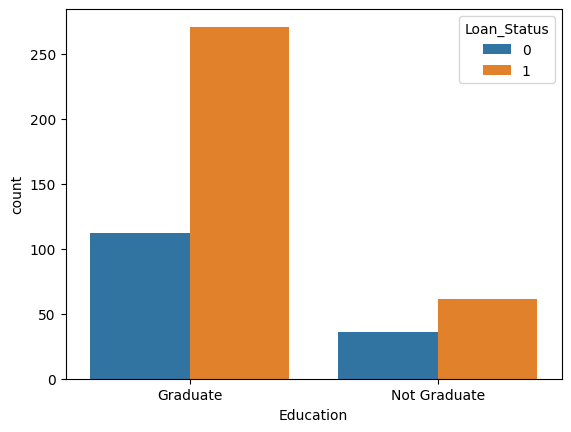

In [23]:
# Education and the loan status
sns.countplot(x= 'Education', hue= 'Loan_Status', data= loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

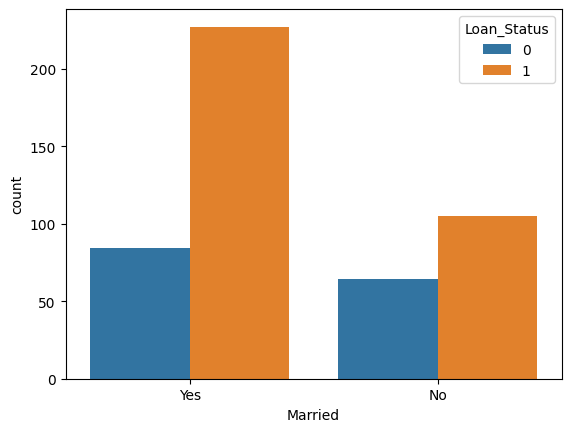

In [24]:
# Marital status and the loan status
sns.countplot(x= 'Married', hue= 'Loan_Status', data= loan_dataset)

In [25]:
# Converting categorical columns to numerical values
loan_dataset.replace({'Married': {'Yes':1, 'No': 0}}, inplace= True)

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_18052\352721742.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Married': {'Yes':1, 'No': 0}}, inplace= True)


In [26]:
loan_dataset

Gender  Married Dependents     Education Self_Employed  ApplicantIncome  \
1      Male        1          1      Graduate            No             4583   
2      Male        1          0      Graduate           Yes             3000   
3      Male        1          0  Not Graduate            No             2583   
4      Male        0          0      Graduate            No             6000   
5      Male        1          2      Graduate           Yes             5417   
..      ...      ...        ...           ...           ...              ...   
609  Female        0          0      Graduate            No             2900   
610    Male        1          4      Graduate            No             4106   
611    Male        1          1      Graduate            No             8072   
612    Male        1          2      Graduate            No             7583   
613  Female        0          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1               1508.0       128.0             360.0             1.0   
2                  0.0        66.0             360.0             1.0   
3               2358.0       120.0             360.0             1.0   
4                  0.0       141.0             360.0             1.0   
5               4196.0       267.0             360.0             1.0   
..                 ...         ...               ...             ...   
609                0.0        71.0             360.0             1.0   
610                0.0        40.0             180.0             1.0   
611              240.0       253.0             360.0             1.0   
612                0.0       187.0             360.0             1.0   
613                0.0       133.0             360.0             0.0   

    Property_Area  Loan_Status  
1           Rural            0  
2           Urban            1  
3           Urban            1  
4           Urban            1  
5           Urban            1  
..            ...          ...  
609         Rural            1  
610         Rural            1  
611         Urban            1  
612         Urban            1  
613     Semiurban            0  

[480 rows x 12 columns]

In [28]:
loan_dataset.replace({'Gender':{'Male': 1, 'Female':0}, 'Education': {'Graduate': 1, 'Not Graduate': 0}, 'Self_Employed': {'Yes': 1, 'No': 0}, 'Property_Area' : {'Urban': 2, 'Rural': 0, 'Semiurban': 1 }}, inplace= True)

In [29]:
loan_dataset.head()

Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1       1        1          1          1              0             4583   
2       1        1          0          1              1             3000   
3       1        1          0          0              0             2583   
4       1        0          0          1              0             6000   
5       1        1          2          1              1             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

   Property_Area  Loan_Status  
1              0            0  
2              2            1  
3              2            1  
4              2            1  
5              2            1

Separating the features and the label

In [31]:
X = loan_dataset.drop(columns= 'Loan_Status', axis= 1)
Y = loan_dataset['Loan_Status']

In [33]:
print(X.shape, Y.shape)

(480, 11) (480,)


In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.1, stratify= Y, random_state= 2)

In [57]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


Training the model using Support Vector Machine model

In [58]:
classifier = svm.SVC(kernel ='linear')

In [59]:
# Training the Support Vector Machine Model
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

In [60]:
# Accuracy Score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
# Accuracy score on the training data above 79% is pretty good
print("Accuracy score on training data:", round(training_data_accuracy * 100,2))

Accuracy score on training data: 79.86


In [62]:
# Accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
# Accuracy score on the test data is above 83% is pretty good
print("Accuracy score on test data:", round(test_data_accuracy * 100, 2))

Accuracy score on test data: 83.33


Making a predictive system

In [83]:
input_data = (1, 1, 1, 0, 0, 4583, 1508.0, 128.0, 360.0, 1.0, 0)

# Converting input data to the numpy array
input_data_to_the_numpy_array = np.asarray(input_data)

# Reshaping the input data 
reshaped_input_data = input_data_to_the_numpy_array.reshape(1, -1)

# Making the prediction
prediction = classifier.predict(reshaped_input_data)
print(prediction)

# Loan Approved
# Y -> 1
# N -> 0

if(prediction[0] == 1):
    print("Approved for loan")
else:
    print("BYE BYE")

[1]
Approved for loan
